# Rate my GU

In [1]:
from fastai.vision import *
from fastai.basic_data import DatasetType

def random_seed(seed_value, use_cuda):
    np.random.seed(seed_value) # cpu vars
    torch.manual_seed(seed_value) # cpu  vars
    random.seed(seed_value) # Python
    if use_cuda: 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False

random_seed(42, True)        

# Path to the dataset
PATH = Path()
gu_ds = PATH/"data/gu-dataset"

# We get the transforms of the images
tfms = get_transforms(do_flip=False)

# We load the dataset
data = (ImageList.from_folder(gu_ds)
       .split_by_folder()
       .label_from_folder()
       .add_test_folder()
       .transform(tfms = tfms, size = 224)
       .databunch(bs = 6))

In [2]:
# We load the model 
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [3]:
# We fit the model
learn.fit_one_cycle(1,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.625372,0.310808,0.857143,00:05


In [4]:
learn.fit_one_cycle(2,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.500404,0.121858,1.000000,00:05
1,0.393731,0.257996,0.857143,00:04


tensor([[9.2842e-04, 9.9907e-01],
        [5.5336e-02, 9.4466e-01],
        [7.2906e-01, 2.7094e-01],
        [6.7229e-01, 3.2771e-01],
        [9.5847e-01, 4.1531e-02],
        [9.9825e-01, 1.7497e-03]])


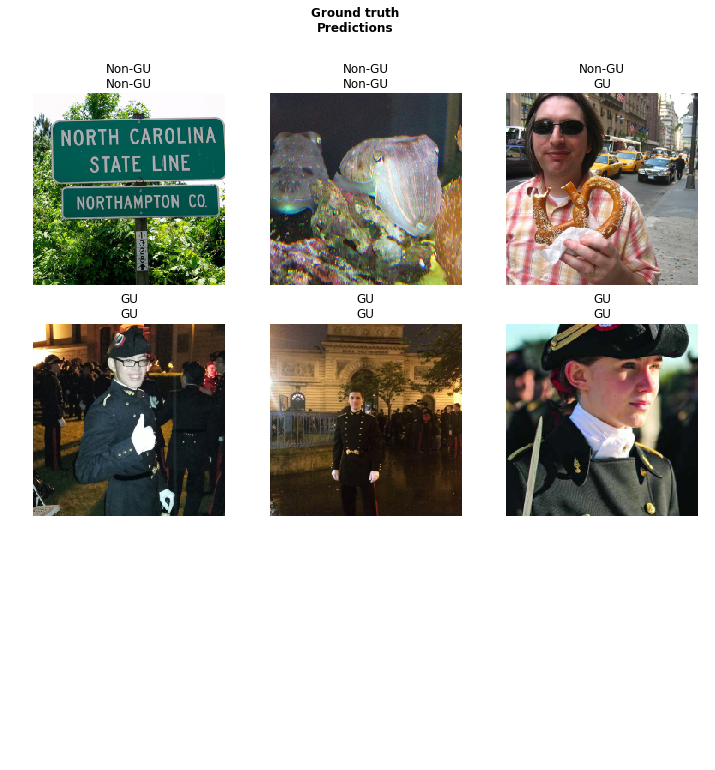

In [5]:
print(learn.pred_batch(DatasetType.Valid))

learn.show_results(DatasetType.Valid)

tensor([[0.0795, 0.9205],
        [0.0089, 0.9911],
        [0.6612, 0.3388],
        [0.8990, 0.1010],
        [0.9960, 0.0040],
        [0.3273, 0.6727]])


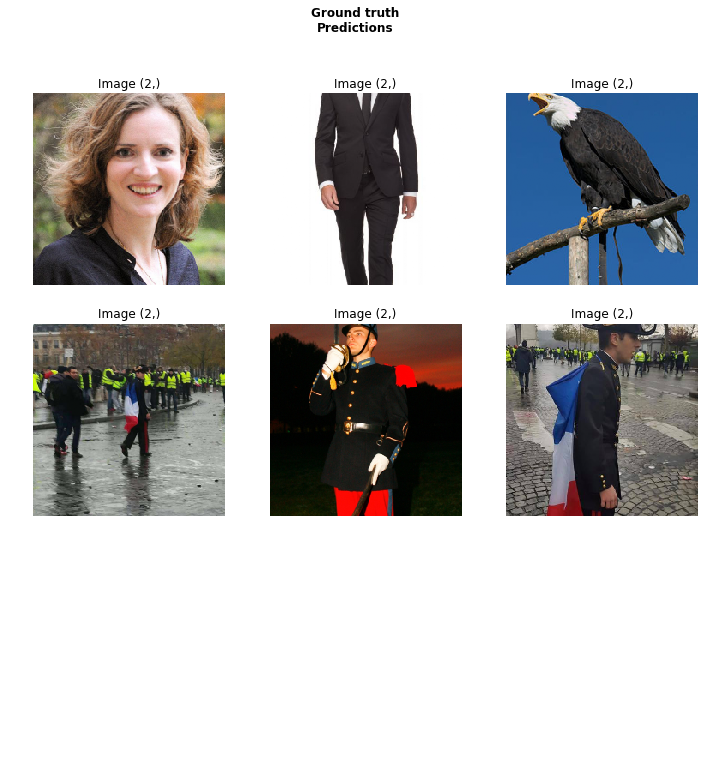

In [6]:
print(learn.pred_batch(DatasetType.Test))

learn.show_results(DatasetType.Test)